# Facets (ggplot2)
Credits: http://www.cookbook-r.com/ (Creative Commons Attribution-Share Alike 3.0 Unported License)

## Problem
You want to do split up your data by one or more variables and plot the subsets of data together.

## Solution
### Sample data

We will use the tips dataset from the reshape2 package.

In [1]:
library(reshape2)
# Look at first few rows
head(tips)
#>   total_bill  tip    sex smoker day   time size
#> 1      16.99 1.01 Female     No Sun Dinner    2
#> 2      10.34 1.66   Male     No Sun Dinner    3
#> 3      21.01 3.50   Male     No Sun Dinner    3
#> 4      23.68 3.31   Male     No Sun Dinner    2
#> 5      24.59 3.61 Female     No Sun Dinner    4
#> 6      25.29 4.71   Male     No Sun Dinner    4

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.5,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
6,25.29,4.71,Male,No,Sun,Dinner,4


This is a scatterplot of the tip percentage by total bill size.

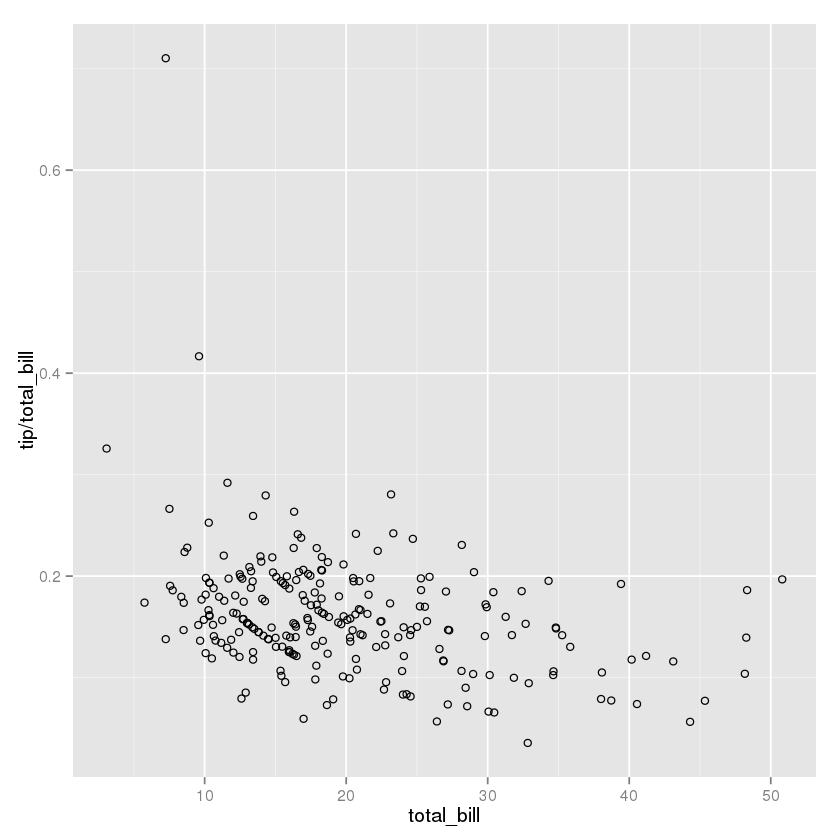

In [2]:
library(ggplot2)
sp <- ggplot(tips, aes(x=total_bill, y=tip/total_bill)) + geom_point(shape=1)
sp

### facet_grid

The data can be split up by one or two variables that vary on the horizontal and/or vertical direction.

This is done by giving a formula to `facet_grid()`, of the form `vertical` ~ `horizontal`.

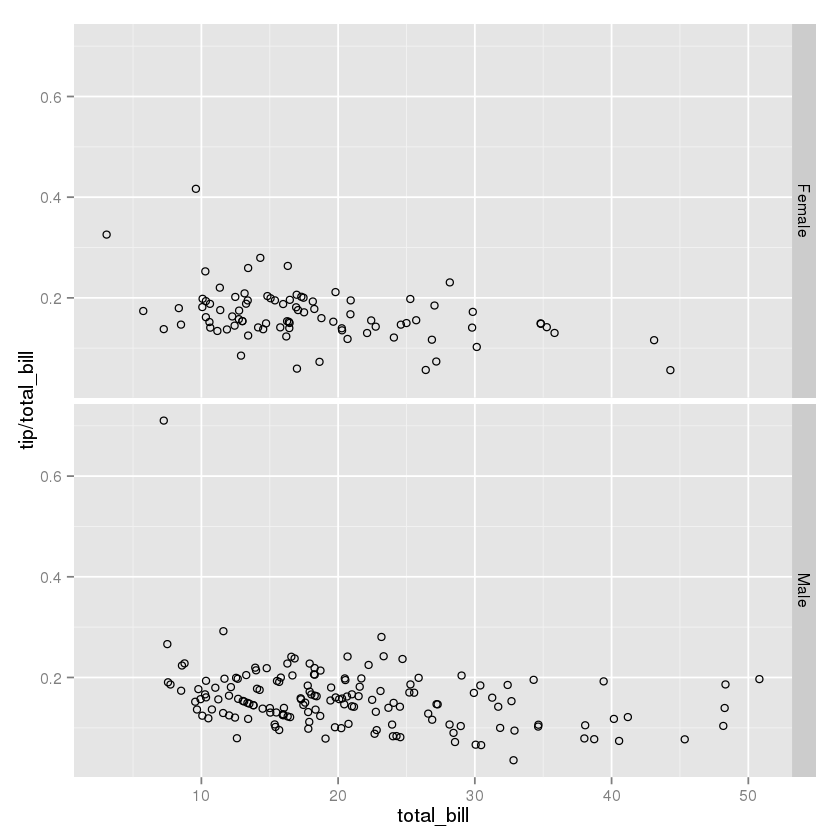

In [3]:
# Divide by levels of "sex", in the vertical direction
sp + facet_grid(sex ~ .)

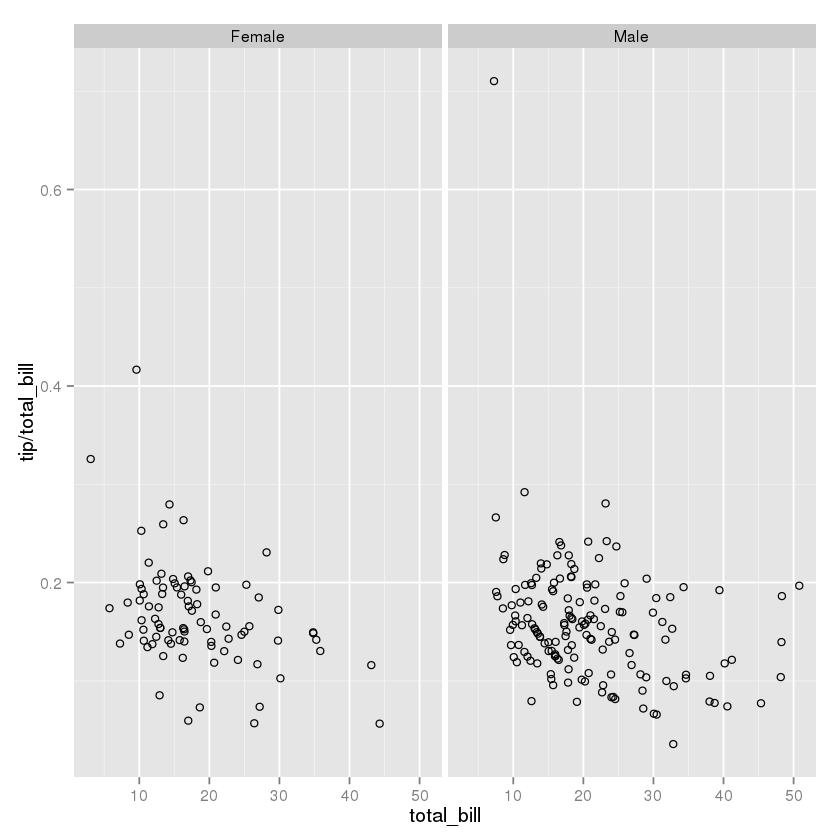

In [4]:
# Divide by levels of "sex", in the horizontal direction
sp + facet_grid(. ~ sex)

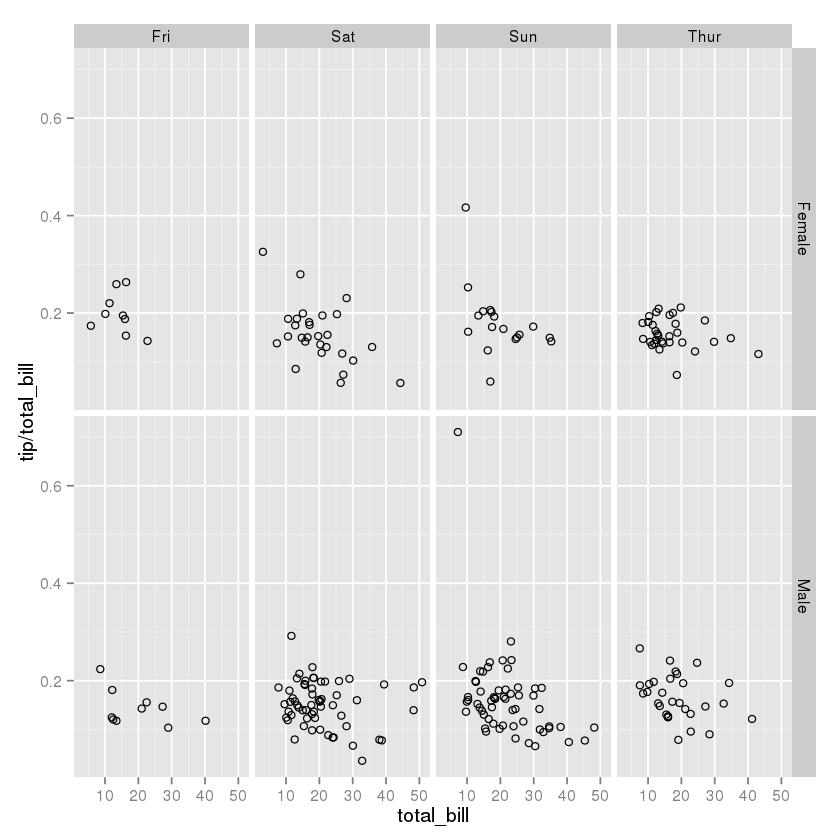

In [5]:
# Divide with "sex" vertical, "day" horizontal
sp + facet_grid(sex ~ day)

### facet_wrap

Instead of faceting with a variable in the horizontal or vertical direction, facets can be placed next to each other, wrapping with a certain number of columns or rows. The label for each plot will be at the top of the plot.

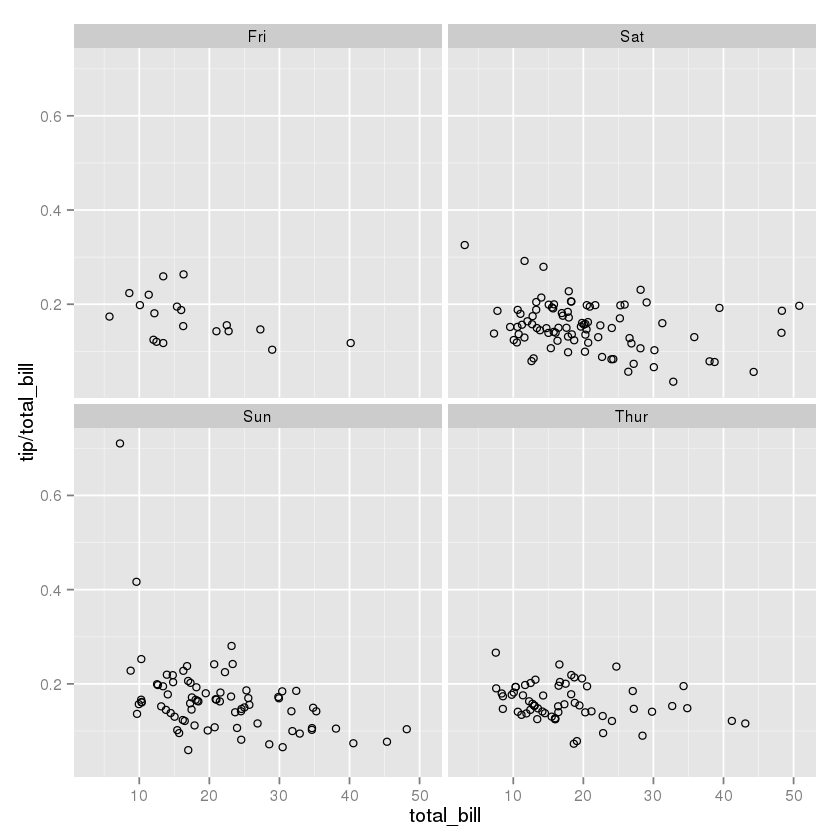

In [6]:
# Divide by day, going horizontally and wrapping with 2 columns
sp + facet_wrap( ~ day, ncol=2)

### Modifying facet label appearance

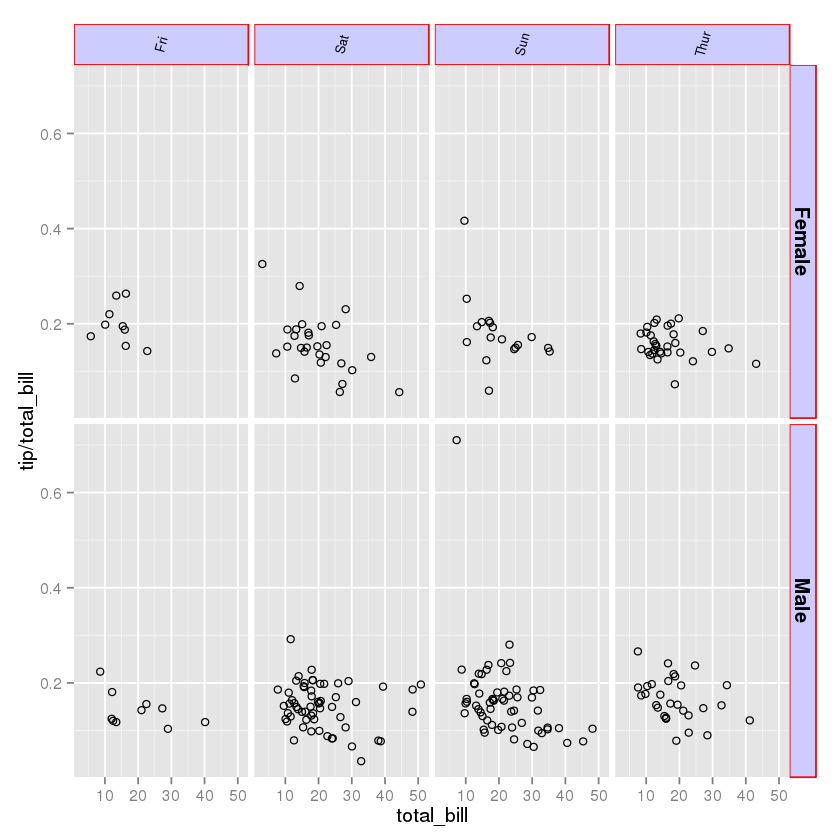

In [7]:
sp + facet_grid(sex ~ day) +
    theme(strip.text.x = element_text(size=8, angle=75),
          strip.text.y = element_text(size=12, face="bold"),
          strip.background = element_rect(colour="red", fill="#CCCCFF"))

### Modifying facet label text

Modifying the text of a facet label is somewhat complex. It is necessary to either (A) create a function which maps the original names to the new names, or (B) change the data frame.

To create a function which maps the levels of `sex` from Female==>Woman, and Male==>Man:

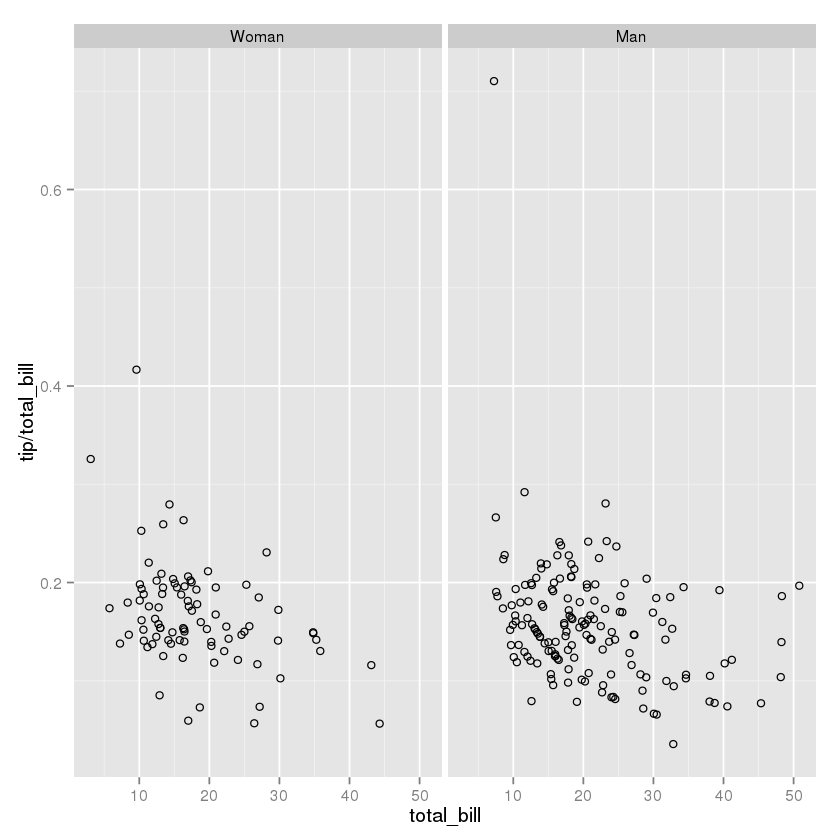

In [8]:
mf_labeller <- function(var, value){
    value <- as.character(value)
    if (var=="sex") { 
        value[value=="Female"] <- "Woman"
        value[value=="Male"]   <- "Man"
    }
    return(value)
}

sp + facet_grid(. ~ sex, labeller=mf_labeller)

To change the data frame:

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Woman,No,Sun,Dinner,2
2,10.34,1.66,Man,No,Sun,Dinner,3
3,21.01,3.5,Man,No,Sun,Dinner,3


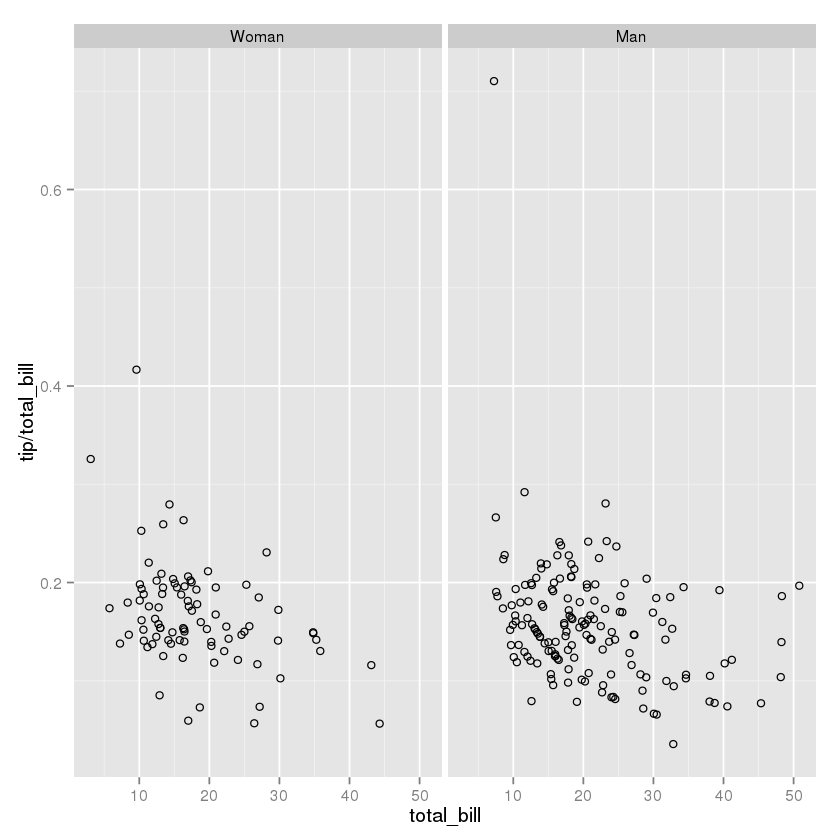

In [9]:
tips2 <- tips
levels(tips2$sex)[levels(tips2$sex)=="Female"] <- "Woman"
levels(tips2$sex)[levels(tips2$sex)=="Male"]   <- "Man"
head(tips2, 3)
#>   total_bill  tip   sex smoker day   time size
#> 1      16.99 1.01 Woman     No Sun Dinner    2
#> 2      10.34 1.66   Man     No Sun Dinner    3
#> 3      21.01 3.50   Man     No Sun Dinner    3

# Both of these will give the same output:
sp2 <- ggplot(tips2, aes(x=total_bill, y=tip/total_bill)) + geom_point(shape=1)
sp2 + facet_grid(. ~ sex)

Both of the examples above give the same result.

### Free scales

Normally, the axis scales on each graph are **fixed**, which means that they have the same size and range. They can be made independent, by setting `scales` to `free`, `free_x`, or `free_y`.

In [10]:
# A histogram of bill sizes
hp <- ggplot(tips, aes(x=total_bill)) + geom_histogram(binwidth=2,colour="white")

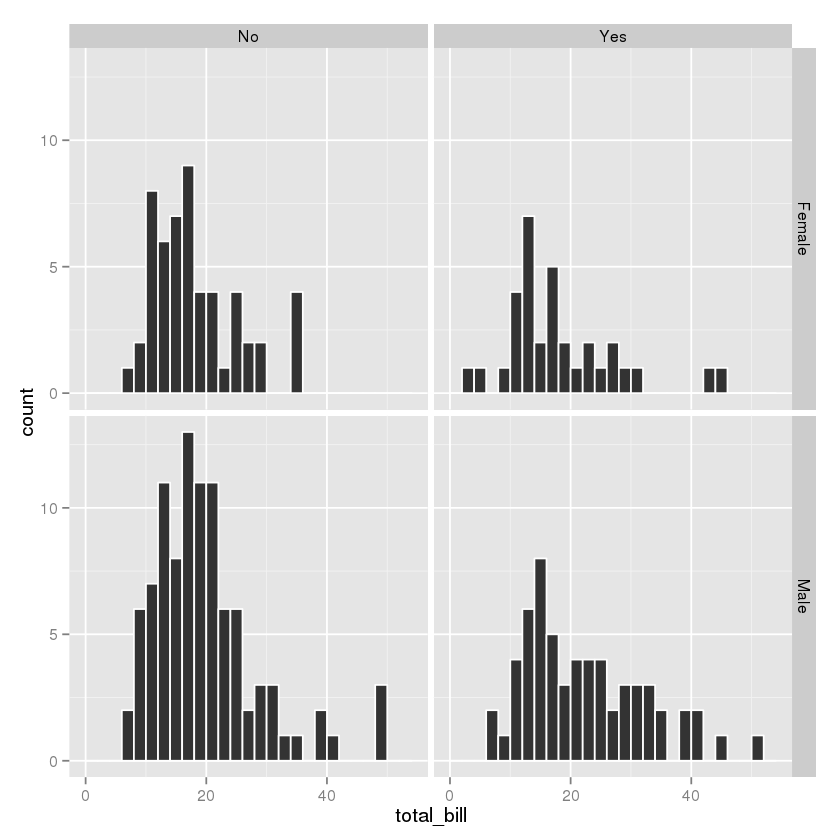

In [11]:
# Histogram of total_bill, divided by sex and smoker
hp + facet_grid(sex ~ smoker)

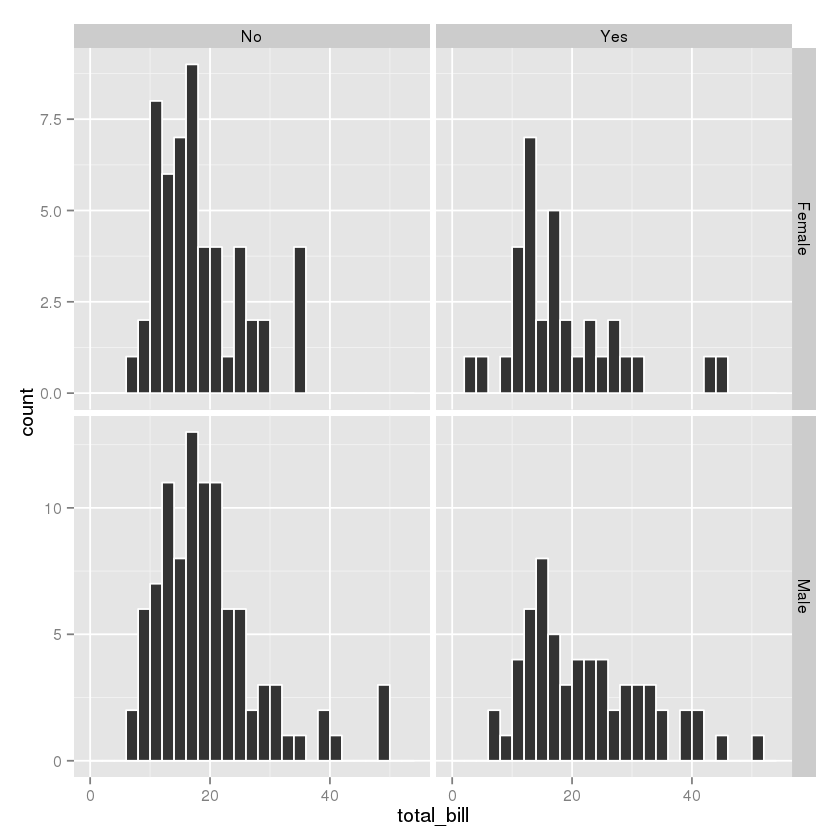

In [12]:
# Same as above, with scales="free_y"
hp + facet_grid(sex ~ smoker, scales="free_y")

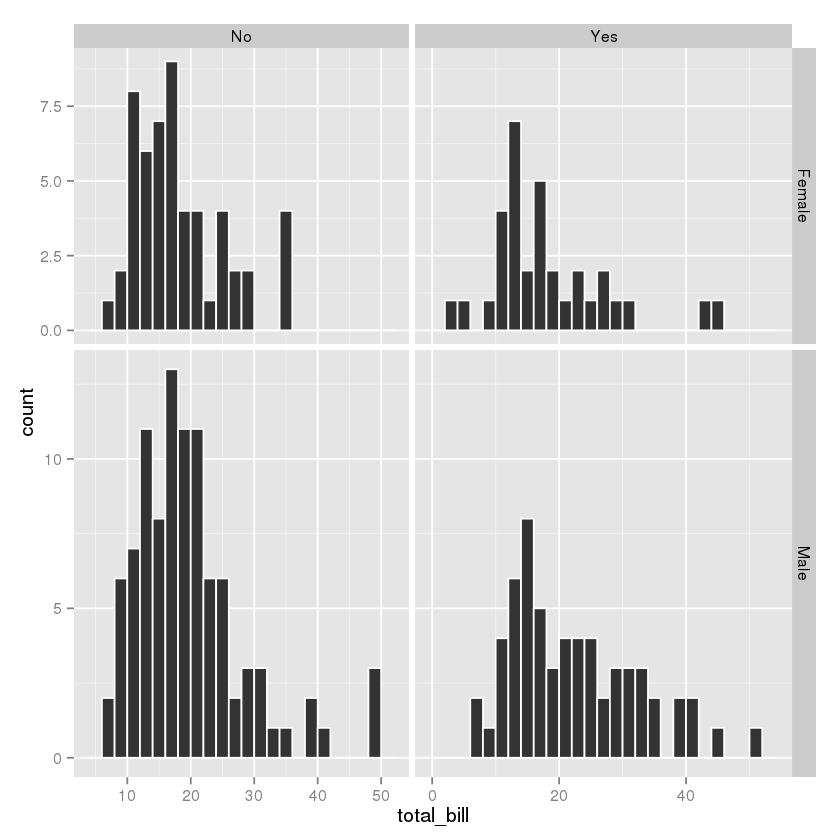

In [13]:
# With panels that have the same scaling, but different range (and therefore different physical sizes)
hp + facet_grid(sex ~ smoker, scales="free", space="free")